In [6]:
from clean_data import *

In [4]:
master = "local[4]"
app_name = "/df case study"
tweet_data = '../data/french_tweets.json'
#create spark instance
spark = create_spark(master, app_name)
#create our original tweets_df
tweets_df = create_df_from_json('../data/french_tweets.json')

In [5]:
#get query results we need to make new cleaned dataframe
tweet_results = query_results_tweets(tweets_df)
#gets hashtag + tweet id results
ht_results = query_results_hashtags(tweets_df)
#gets location + tweet id results
geo_results = query_results_location(tweets_df)

In [7]:
tweet_schema = StructType( [
    StructField('Tweet_ID', StringType(), True),
    StructField('Created_At', StringType(), True),
    StructField('Username',StringType(),True),
    StructField('Tweet_Text', StringType(), True),
    StructField('Tweet_Language', StringType(), True),
    StructField('Retweet_Count', IntegerType(), True)] )
#create cleaned tweet dataframe
clean_tweet_df = create_clean_df(tweet_results, tweet_schema)

ht_schema = StructType( [
    StructField('Tweet_ID', StringType(), True),
    StructField('Hashtag',StringType(),True)] )
#create cleaned hashtag dataframe
ht_df = create_clean_df(ht_results, ht_schema)

geo_schema = StructType( [
    StructField('Tweet_ID', StringType(), True),
    StructField('Longitude',FloatType(),True),
    StructField('Lattitude',FloatType(),True)] )
#create cleaned location dataframe
geo_df = create_clean_df(geo_results, geo_schema)

In [8]:
tweet_pdf_df = pandas_df(clean_tweet_df)
ht_pd_df = pandas_df(ht_df)
geo_pd_df = pandas_df(geo_df)

In [11]:
from wordcloud import WordCloud, STOPWORDS 

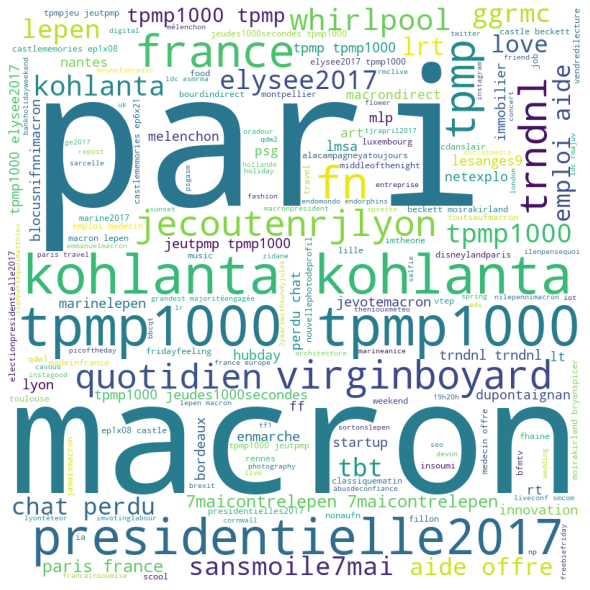

<Figure size 432x288 with 0 Axes>

In [20]:
comment_words = '' 
stopwords1 = set(STOPWORDS) 
  
# iterate through the csv file 
for val in ht_pd_df['Hashtag']: 
      
    # typecaste each val to string 
    val = str(val).lower() 
  
    # split the value 
#     tokens = val.split() 
      
    # Converts each token into lowercase 
#     for i in range(len(val)): 
#         val[i] = val[i].lower() 
      
    comment_words += "".join(val)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords1, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
plt.savefig('../images/wordcloud.png')

In [23]:
ht_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95541 entries, 0 to 95540
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  95541 non-null  object
 1   Hashtag   95541 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


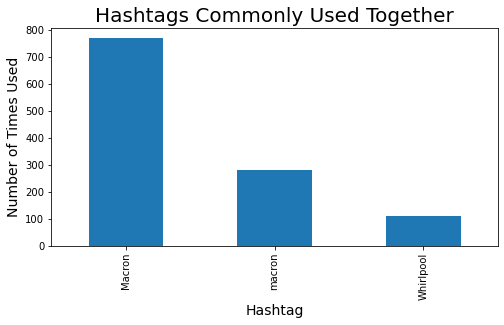

In [31]:
mac_whirl = ht_pd_df[ht_pd_df['Hashtag'].isin(['Macron', 'Whirlpool', 'macron'])]

fig, ax = plt.subplots(figsize=(8,4))
ax = mac_whirl['Hashtag'].value_counts()[:].plot(kind='bar')
ax.set_title('Hashtags Commonly Used Together', fontsize=20)
ax.set_xlabel('Hashtag', fontsize=14)
ax.set_ylabel('Number of Times Used', fontsize=14);

In [33]:
import descartes
import geopandas as gbp
#import geoplot
from shapely.geometry import Point, Polygon

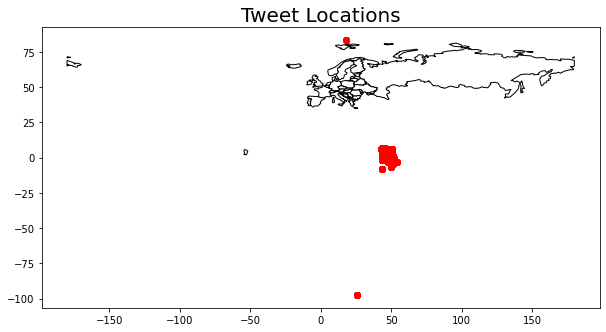

In [46]:
# Want a vanilla pandas df
pd_geo = geo_pd_df
# numeric data
pd_geo["Lat"] = pd_geo["Lattitude"].astype(float)
pd_geo["Long"] = pd_geo["Longitude"].astype(float)
geometry = [Point(xy) for xy in zip(pd_geo["Long"], pd_geo["Lat"])]
geometry[:3]
gdf = gbp.GeoDataFrame(
    pd_geo, geometry=gbp.points_from_xy(pd_geo.Long, pd_geo.Lat))
# Eliminate nulls
gdf2 = gdf[gdf['Longitude'] > 0]
gdf2
world = gbp.read_file(gbp.datasets.get_path('naturalearth_lowres'))
# We cant restrict to South America with filter.

ax = world[world.continent == 'Europe'].plot(color='white', edgecolor='black', figsize=(10,6))
# We can now plot our ``GeoDataFrame``.
gdf2.plot(ax=ax, color='red')
ax.set_title('Tweet Locations', fontsize=20)
plt.show()


